# NYC Public School Analysis
LAGCC Data Analytics

Shelley Shen

This analysis aims to analyze student test performance on the NYC Regents exams between schools in the year 2017. 

In [32]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import and preview data
missing_values = ['s']
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', 
                 na_values = missing_values)

# view column names
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [ ]:
df

In [58]:
# select certain columns
df1 = df.loc[:, ['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year', 'Mean Score', 'Number Scoring 65 or Above', 'Percent Scoring 65 or Above', 'Number Scoring 80 or Above', 'Percent Scoring 80 or Above']]

# rename column names
df1 = df1.rename(columns = {'Number Scoring 65 or Above': 'Number Passed', 'Percent Scoring 65 or Above': 'Percent Passed', 'Number Scoring 80 or Above': 'Number 80+', 'Percent Scoring 80 or Above': 'Percent 80+'})
df1.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Mean Score', 'Number Passed', 'Percent Passed', 'Number 80+',
       'Percent 80+'],
      dtype='object')

In [59]:
# replace NA values with median value of the column
med_mean_score = df1['Mean Score'].median()
med_n_passed = df1['Number Passed'].median()
med_p_passed = df1['Percent Passed'].median()
med_n_80 = df1['Number 80+'].median()
med_p_80 = df1['Percent 80+'].median()

df1['Mean Score'].fillna(med_mean_score, inplace = True)
df1['Number Passed'].fillna(med_n_passed, inplace = True)
df1['Percent Passed'].fillna(med_p_passed, inplace = True)
df1['Number 80+'].fillna(med_n_80, inplace = True)
df1['Percent 80+'].fillna(med_p_80, inplace = True)

In [ ]:
df1

In [61]:
# select borough, classes, and year for comparison

df_manhattan = df1.loc[(df1['School DBN'].str[2] == 'M') & (df1['Year'] == 2017)]
df_manhattan = df_manhattan[(df_manhattan['School Level'] == 'High school') | (df_manhattan['School Level'] == 'K-12')]
df_manhattan

,School DBN,School Name,School Level,Regents Exam,Year,Mean Score,Number Passed,Percent Passed,Number 80+,Percent 80+
22,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,67.5,38.0,71.7,6.0,11.3
24,01M292,Orchard Collegiate Academy,High school,Common Core Algebra2,2017,65.4,21.0,59.8,5.0,12.5
27,01M292,Orchard Collegiate Academy,High school,Common Core English,2017,77.2,38.0,92.7,22.0,53.7
30,01M292,Orchard Collegiate Academy,High school,Common Core Geometry,2017,56.8,2.0,18.2,0.0,0.0
37,01M292,Orchard Collegiate Academy,High school,Global History and Geography,2017,59.3,21.0,39.6,6.0,11.3
...,...,...,...,...,...,...,...,...,...,...
210124,84M707,John V. Lindsay Wildcat Academy Charter School,High school,Living Environment,2017,65.4,21.0,59.8,5.0,12.5
210127,84M707,John V. Lindsay Wildcat Academy Charter School,High school,Physical Settings/Chemistry,2017,65.4,21.0,59.8,5.0,12.5
210138,84M707,John V. Lindsay Wildcat Academy Charter School,High school,U.S. History and Government,2017,71.4,31.0,75.6,8.0,19.5
210139,84M707,John V. Lindsay Wildcat Academy Charter School,High school,U.S. History and Government,2017,65.4,21.0,59.8,5.0,12.5


In [111]:
# filter for a specific school for comparison
df_cascade = df1.loc[(df1['School Name'] == 'Cascades High School')]
df_cascade

,School DBN,School Name,School Level,Regents Exam,Year,Mean Score,Number Passed,Percent Passed,Number 80+,Percent 80+
228,01M650,Cascades High School,High school,Algebra2/Trigonometry,2016,65.4,21.0,59.8,5.0,12.5
229,01M650,Cascades High School,High school,Common Core Algebra,2015,65.4,21.0,59.8,5.0,12.5
230,01M650,Cascades High School,High school,Common Core Algebra,2016,61.4,13.0,33.3,1.0,2.6
231,01M650,Cascades High School,High school,Common Core Algebra,2017,64.1,30.0,60.0,3.0,6.0
232,01M650,Cascades High School,High school,Common Core English,2015,75.3,14.0,87.5,4.0,25.0
...,...,...,...,...,...,...,...,...,...,...
140813,01M650,Cascades High School,High school,U.S. History and Government,2016,65.4,21.0,59.8,5.0,12.5
140814,01M650,Cascades High School,High school,U.S. History and Government,2017,65.4,21.0,59.8,5.0,12.5
140815,01M650,Cascades High School,High school,U.S. History and Government,2017,73.5,19.0,79.2,8.0,33.3
140816,01M650,Cascades High School,High school,U.S. History and Government,2017,72.9,31.0,81.6,12.0,31.6


In [54]:
# descriptive statistics for schools in Manhattan borough

df_manhattan.describe()
df_manhattan_mean = df_manhattan[['Regents Exam', 'Mean Score','Number Passed', 'Percent Passed', 'Number 80+', 'Percent 80+']].mean()
df_manhattan_mean

Mean Score        67.553342
Number Passed     44.733361
Percent Passed    60.949396
Number 80+        22.580174
Percent 80+       26.751502
dtype: float64

In [55]:
# descriptive statistics for Cascades High School

df_cascade.describe()
df_cascade_mean = df_cascade[['Regents Exam', 'Mean Score','Number Passed', 'Percent Passed', 'Number 80+', 'Percent 80+']].mean()
df_cascade_mean

Mean Score        66.781967
Number Passed     22.508197
Percent Passed    64.320492
Number 80+         6.680328
Percent 80+       17.090164
dtype: float64

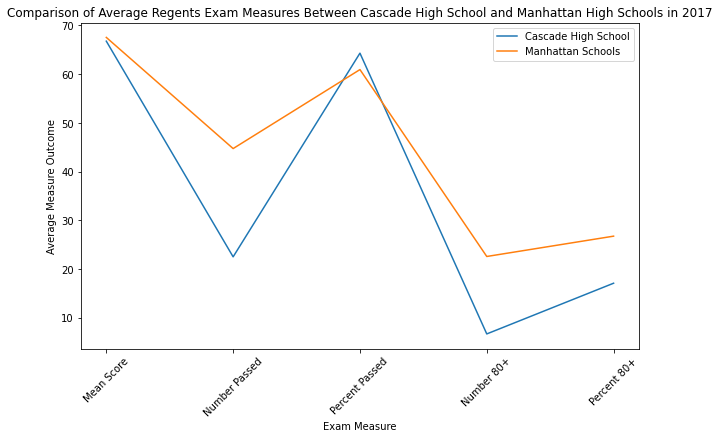

In [103]:
# plotting average scoring measures between Cascade High School and Manhattan high schools

plt.figure(figsize=(10, 6))
plt.plot(df_cascade_mean.index, df_cascade_mean.values, label = 'Cascade High School')
plt.plot(df_manhattan_mean.index, df_manhattan_mean.values, label = 'Manhattan Schools')
plt.xlabel('Exam Measure')
plt.ylabel('Average Measure Outcome')
plt.title('Comparison of Average Regents Exam Measures Between Cascade High School and Manhattan High Schools in 2017')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [128]:
# average Regents exam mean scores in Cascade High School
df_cascade.groupby(['Regents Exam'])['Mean Score'].mean()

Regents Exam
Algebra2/Trigonometry              65.400000
Common Core Algebra                64.334375
Common Core English                67.524324
Common Core Geometry               64.433333
English                            67.879167
Geometry                           65.400000
Global History and Geography       64.479487
Integrated Algebra                 65.766667
Living Environment                 65.420000
Physical Settings/Earth Science    64.060870
U.S. History and Government        69.063158
Name: Mean Score, dtype: float64

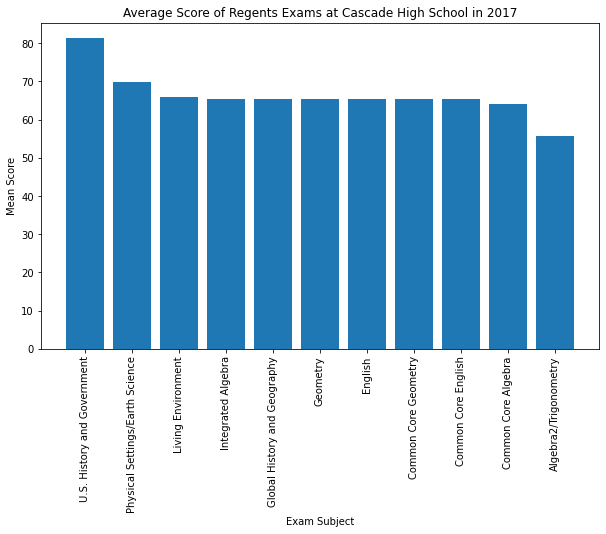

In [130]:
# plotting Regents exam mean scores in Cascade High School 

df_cascade.groupby(['Regents Exam'])['Mean Score'].mean().sort_values(ascending=False)
df_cascade_x = df_cascade['Regents Exam'].sort_values(ascending=False)
df_cascade_y = df_cascade['Mean Score'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_cascade_x, df_cascade_y, width = 0.8)
plt.xlabel('Exam Subject')
plt.ylabel('Mean Score')
plt.title('Average Score of Regents Exams at Cascade High School in 2017')
plt.xticks(rotation = 90)
fig.subplots_adjust(bottom = 0.1, left = 0.1)

In [129]:
# average Regents exams percent passed in Cascade High School 
df_cascade.groupby(['Regents Exam'])['Percent Passed'].mean()

Regents Exam
Algebra2/Trigonometry              59.800000
Common Core Algebra                53.850000
Common Core English                69.213514
Common Core Geometry               57.172222
English                            65.120833
Geometry                           59.800000
Global History and Geography       57.933333
Integrated Algebra                 61.933333
Living Environment                 62.025714
Physical Settings/Earth Science    55.752174
U.S. History and Government        69.010526
Name: Percent Passed, dtype: float64

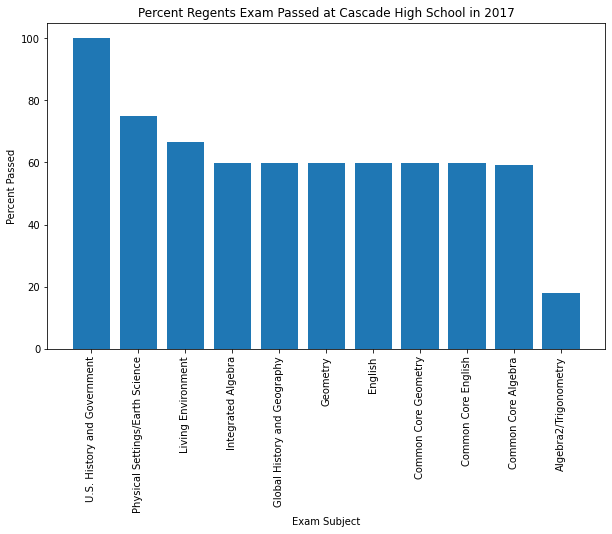

In [125]:
# plotting Regents exams percent passed in Cascade High School 

df_cascade.groupby(['Regents Exam'])['Percent Passed'].mean().sort_values(ascending=False)
df_cascade_x = df_cascade['Regents Exam'].sort_values(ascending=False)
df_cascade_y = df_cascade['Percent Passed'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_cascade_x, df_cascade_y, width = 0.8)
plt.xlabel('Exam Subject')
plt.ylabel('Percent Passed')
plt.title('Percent Regents Exam Passed at Cascade High School in 2017')
plt.xticks(rotation = 90)
fig.subplots_adjust(bottom = 0.1, left = 0.1)

In [132]:
# average Regents exam mean scores in Manhattan high schools
df_manhattan.groupby(['Regents Exam'])['Mean Score'].mean()

Regents Exam
Algebra2/Trigonometry              62.003916
Common Core Algebra                67.824124
Common Core Algebra2               65.868310
Common Core English                71.230090
Common Core Geometry               62.637994
Global History and Geography       65.943575
Living Environment                 67.593083
Physical Settings/Chemistry        65.316511
Physical Settings/Earth Science    63.110959
Physical Settings/Physics          67.010393
U.S. History and Government        70.955471
Name: Mean Score, dtype: float64

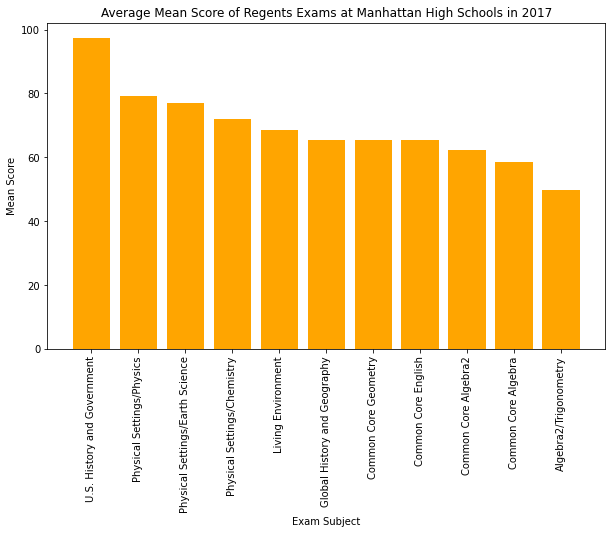

In [133]:
# plotting average Regents exam mean scores in Manhattan high schools
df_manhattan.groupby(['Regents Exam'])['Mean Score'].mean().sort_values(ascending=False)
df_manhattan_x = df_manhattan['Regents Exam'].sort_values(ascending=False)
df_manhattan_y = df_manhattan['Mean Score'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_manhattan_x, df_manhattan_y, width = 0.8, color = 'orange')
plt.xlabel('Exam Subject')
plt.ylabel('Mean Score')
plt.title('Average Mean Score of Regents Exams at Manhattan High Schools in 2017')
plt.xticks(rotation = 90)
fig.subplots_adjust(bottom = 0.1, left = 0.1)

In [109]:
# average percent of Regents exams passed in Manhattan high schools
df_manhattan.groupby(['Regents Exam'])['Percent Passed'].mean()

Regents Exam
Algebra2/Trigonometry              49.455614
Common Core Algebra                64.444662
Common Core Algebra2               59.719601
Common Core English                74.424962
Common Core Geometry               48.119190
Global History and Geography       57.140692
Living Environment                 62.743917
Physical Settings/Chemistry        55.366844
Physical Settings/Earth Science    50.474886
Physical Settings/Physics          61.387640
U.S. History and Government        68.104966
Name: Percent Passed, dtype: float64

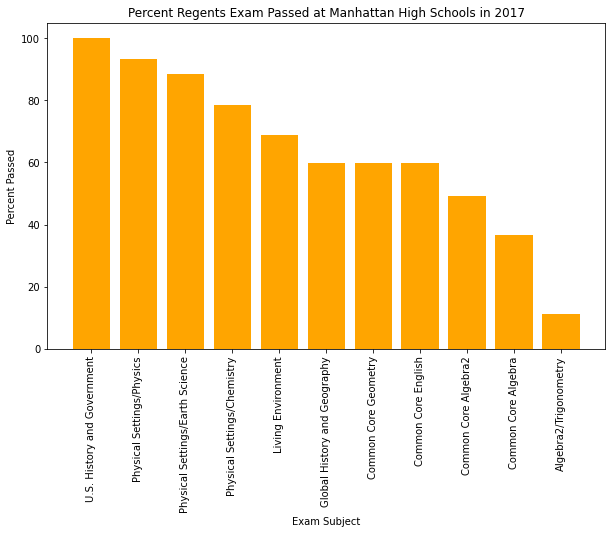

In [121]:
# plotting average percent of Regents exams passed in Manhattan high schools
df_manhattan.groupby(['Regents Exam'])['Percent Passed'].mean().sort_values(ascending=False)
df_manhattan_x = df_manhattan['Regents Exam'].sort_values(ascending=False)
df_manhattan_y = df_manhattan['Percent Passed'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_manhattan_x, df_manhattan_y, width = 0.8, color = 'orange')
plt.xlabel('Exam Subject')
plt.ylabel('Percent Passed')
plt.title('Percent Regents Exam Passed at Manhattan High Schools in 2017')
plt.xticks(rotation = 90)
fig.subplots_adjust(bottom = 0.1, left = 0.1)

## Conclusion

This analysis compared Cascades High School performance on NYC Regents Exams with other high schools in Manhattan in 2017. The mean score of all exams was lower at Cascades (66.8) than other schools in the borough (67.6) but a greater percent passed the exams by scoring 65 or above at Cascade (64.3%) than in other schools (60.9%). Fewer and a lower percent of students at Cascades scored above 80 on exams than those at other Manhattan schools. 

When comparing the different Regent exam subjects, Cascades students performed better than their counterparts in other Manhattan schools in Algebra2/Trignometry (59.7% vs 49.5% passed), Common Core Geometry (57.2% vs. 48.1% passed), and Physical Settings/Earth Science (55.8% vs. 50.5% passed). Cascades students did not perform as well in Common Core Algebra, Common Core English, Global History and Geography, and Living Environment. 
